In [194]:
import pandas as pd
import numpy as  np
import seaborn as sb
import matplotlib.pyplot as plt

In [195]:
Data= pd.read_csv("C:/Users/vabsa/Desktop/Datasets/Game_Sales/vgsales.csv")

In [196]:
Data.head()


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [197]:
Data.shape

(16598, 11)

In [198]:
Data.describe

<bound method NDFrame.describe of         Rank                                              Name Platform  \
0          1                                        Wii Sports      Wii   
1          2                                 Super Mario Bros.      NES   
2          3                                    Mario Kart Wii      Wii   
3          4                                 Wii Sports Resort      Wii   
4          5                          Pokemon Red/Pokemon Blue       GB   
...      ...                                               ...      ...   
16593  16596                Woody Woodpecker in Crazy Castle 5      GBA   
16594  16597                     Men in Black II: Alien Escape       GC   
16595  16598  SCORE International Baja 1000: The Official Game      PS2   
16596  16599                                        Know How 2       DS   
16597  16600                                  Spirits & Spells      GBA   

         Year         Genre   Publisher  NA_Sales  EU_Sales  JP_S

In [199]:
Data.nunique()

Rank            16598
Name            11493
Platform           31
Year               39
Genre              12
Publisher         578
NA_Sales          409
EU_Sales          305
JP_Sales          244
Other_Sales       157
Global_Sales      623
dtype: int64

In [200]:
Data['Platform'].unique()


array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC',
       'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [201]:
Data['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [202]:
Data.replace(["", " ", "NA", "N/A", "None", "-", "nan", "null", "NULL"], np.nan, inplace=True)

In [203]:
Data.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [204]:
Data['Publisher'] = Data['Publisher'].fillna(Data['Publisher'].mode()[0])
Data['Year'] = Data['Year'].fillna(Data['Year'].mean())

In [205]:
Data.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [206]:
print(Data.duplicated().sum())

0


Text(0.5, 1.0, 'year')

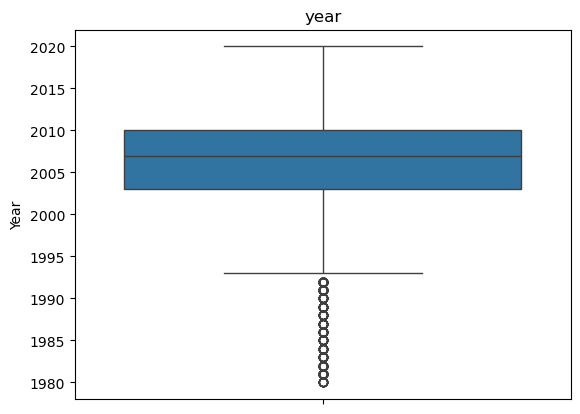

In [207]:
sb.boxplot(Data['Year'])
plt.title('year')

In [208]:
sales = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']
for column in sales:
    Q1 = Data[column].quantile(0.25)
    Q3 = Data[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = Data[(Data[column] < lower_bound) | (Data[column] > upper_bound)]
    print(column)
    print('outliers count:', outliers.shape[0])
    print(outliers[[column]])
    print("--------------------------------------")

NA_Sales
outliers count: 1681
      NA_Sales
0        41.49
1        29.08
2        15.85
3        15.75
4        11.27
...        ...
2977      0.62
2981      0.63
2995      0.63
3044      0.63
3079      0.62

[1681 rows x 1 columns]
--------------------------------------
EU_Sales
outliers count: 2081
      EU_Sales
0        29.02
1         3.58
2        12.88
3        11.01
4         8.89
...        ...
5463      0.30
5523      0.28
5636      0.28
5643      0.30
5759      0.29

[2081 rows x 1 columns]
--------------------------------------
JP_Sales
outliers count: 2425
       JP_Sales
0          3.77
1          6.81
2          3.79
3          3.28
4         10.22
...         ...
10399      0.11
10405      0.11
10408      0.11
10410      0.11
10412      0.11

[2425 rows x 1 columns]
--------------------------------------
Other_Sales
outliers count: 1665
      Other_Sales
0            8.46
1            0.77
2            3.31
3            2.96
4            1.00
...           ...
7138   

In [209]:
Data.drop('Name', axis=1, inplace=True)

In [210]:
Data.drop('Rank', axis=1, inplace=True)

In [211]:
Data.head()

,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [212]:
Data  = pd.get_dummies(Data, columns=['Genre'])


In [213]:
Data['Year'] = Data['Year'].astype(int)


In [214]:
print(Data['Year'].unique().tolist())

[2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010, 2013, 2004, 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014, 1992, 1997, 1993, 1994, 1982, 2003, 1986, 2000, 1995, 2016, 1991, 1981, 1987, 1980, 1983, 2020, 2017]


In [215]:
def classify_y(Year):
    if 1980 <= Year <= 1989:
        return '0' 
    elif 1990 <= Year <= 1999:
        return '1' 
    elif 2000 <= Year <= 2009:
        return '2'
    elif 2010 <= Year <= 2019:
        return '3'
    elif Year >= 2020: 
        return '4'

Data['year'] = Data['Year'].apply(classify_y)
Data.head()

,Platform,Year,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Genre_Action,Genre_Adventure,...,Genre_Misc,Genre_Platform,Genre_Puzzle,Genre_Racing,Genre_Role-Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy,year
0,Wii,2006,Nintendo,41.49,29.02,3.77,8.46,82.74,False,False,...,False,False,False,False,False,False,False,True,False,2
1,NES,1985,Nintendo,29.08,3.58,6.81,0.77,40.24,False,False,...,False,True,False,False,False,False,False,False,False,0
2,Wii,2008,Nintendo,15.85,12.88,3.79,3.31,35.82,False,False,...,False,False,False,True,False,False,False,False,False,2
3,Wii,2009,Nintendo,15.75,11.01,3.28,2.96,33.00,False,False,...,False,False,False,False,False,False,False,True,False,2
4,GB,1996,Nintendo,11.27,8.89,10.22,1.00,31.37,False,False,...,False,False,False,False,True,False,False,False,False,1


In [216]:
Data.drop('Year', axis=1, inplace=True)
publisher_sales_mean = Data.groupby('Publisher')['Global_Sales'].mean()
Data['Publisher_encoded'] = Data['Publisher'].map(publisher_sales_mean)
Data[['Publisher', 'Publisher_encoded']].head()

Data.drop('Publisher', axis=1, inplace=True)
platform_sales_mean = Data.groupby('Platform')['Global_Sales'].mean()
Data['Platform_encoded'] = Data['Platform'].map(platform_sales_mean)
Data[['Platform', 'Platform_encoded']].head()

,Platform,Platform_encoded
0,Wii,0.699404
1,NES,2.561939
2,Wii,0.699404
3,Wii,0.699404
4,GB,2.606633


In [217]:
Data.drop('Platform', axis=1, inplace=True)



In [218]:
genre_columns = ['Genre_Action', 'Genre_Adventure', 'Genre_Fighting', 'Genre_Misc', 
                 'Genre_Platform', 'Genre_Puzzle', 'Genre_Racing', 'Genre_Role-Playing', 
                 'Genre_Shooter', 'Genre_Simulation', 'Genre_Sports', 'Genre_Strategy']
Data[genre_columns] = Data[genre_columns].astype(int)
Data.head()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Genre_Action,Genre_Adventure,Genre_Fighting,Genre_Misc,Genre_Platform,Genre_Puzzle,Genre_Racing,Genre_Role-Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy,year,Publisher_encoded,Platform_encoded
0,41.49,29.02,3.77,8.46,82.74,0,0,0,0,0,0,0,0,0,0,1,0,2,2.541337,0.699404
1,29.08,3.58,6.81,0.77,40.24,0,0,0,0,1,0,0,0,0,0,0,0,0,2.541337,2.561939
2,15.85,12.88,3.79,3.31,35.82,0,0,0,0,0,0,1,0,0,0,0,0,2,2.541337,0.699404
3,15.75,11.01,3.28,2.96,33.00,0,0,0,0,0,0,0,0,0,0,1,0,2,2.541337,0.699404
4,11.27,8.89,10.22,1.00,31.37,0,0,0,0,0,0,0,1,0,0,0,0,1,2.541337,2.606633


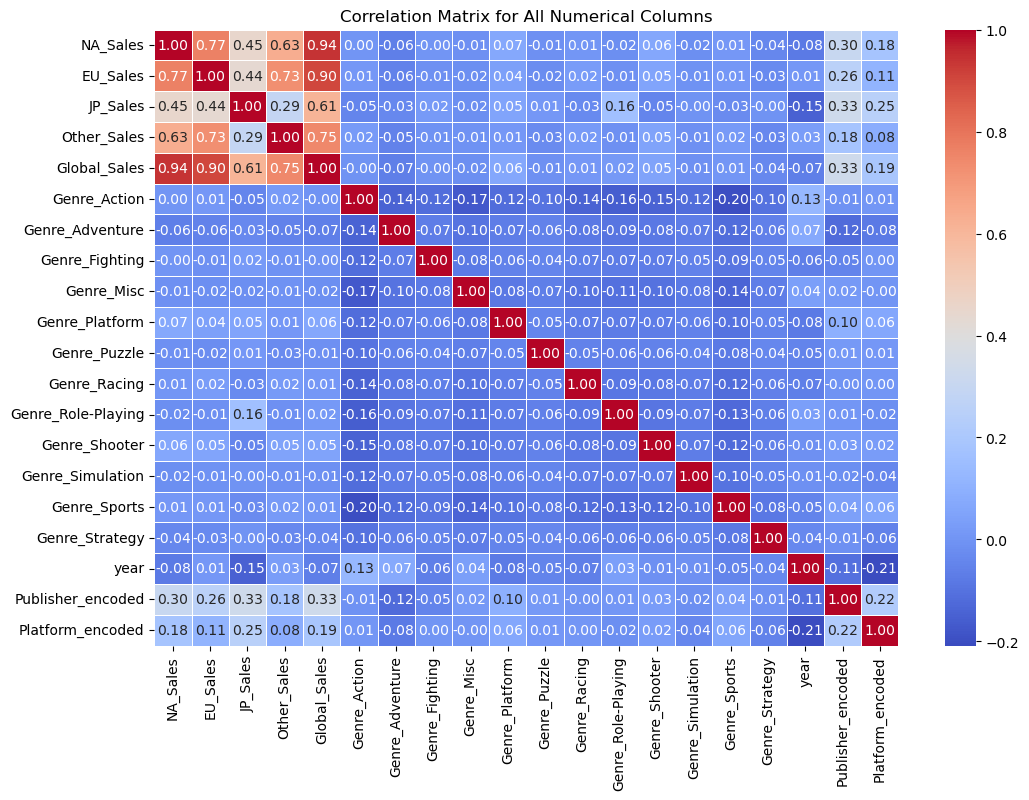

In [219]:
corr_matrix = Data.corr()
plt.figure(figsize=(12, 8))
sb.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix for All Numerical Columns')
plt.show()

In [220]:
correlation_matrix = Data.corr(numeric_only=True)
glo_corr = correlation_matrix['Global_Sales'].drop('Global_Sales')
glo_corr_sorted = glo_corr.sort_values(ascending=False)
print("Top features correlated with Global Sales:\n")
print(glo_corr_sorted)

Top features correlated with Global Sales:

NA_Sales              0.941047
EU_Sales              0.902836
Other_Sales           0.748331
JP_Sales              0.611816
Publisher_encoded     0.330341
Platform_encoded      0.190083
Genre_Platform        0.061223
Genre_Shooter         0.047899
Genre_Role-Playing    0.017314
Genre_Racing          0.008927
Genre_Sports          0.007796
Genre_Fighting       -0.001204
Genre_Action         -0.003001
Genre_Simulation     -0.012844
Genre_Puzzle         -0.014290
Genre_Misc           -0.015770
Genre_Strategy       -0.037284
Genre_Adventure      -0.065521
Name: Global_Sales, dtype: float64


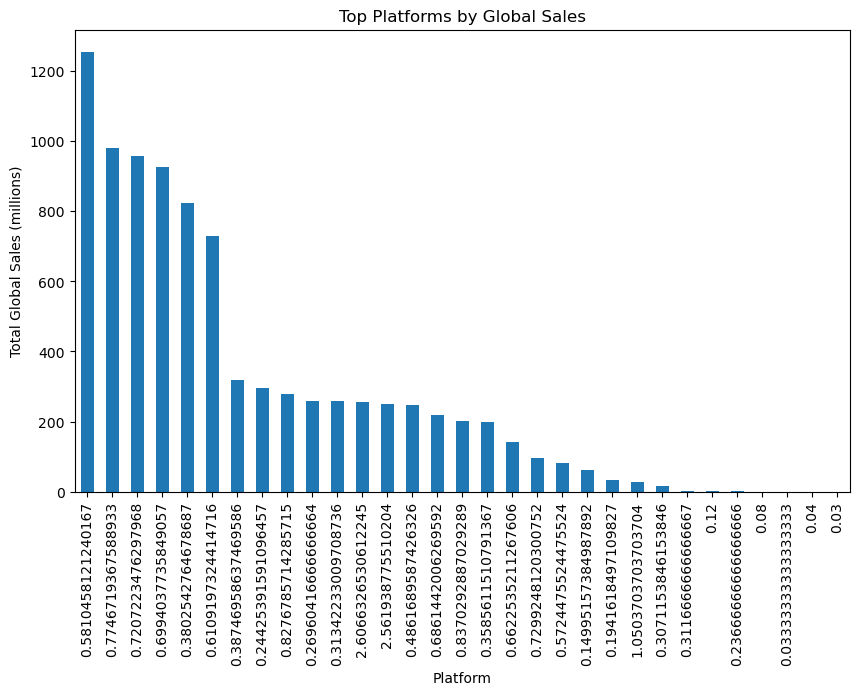

In [221]:
#the best-selling platform globally
plt.figure(figsize=(10, 6))
Data.groupby('Platform_encoded')['Global_Sales'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Top Platforms by Global Sales')
plt.xlabel('Platform')
plt.ylabel('Total Global Sales (millions)')
plt.show()

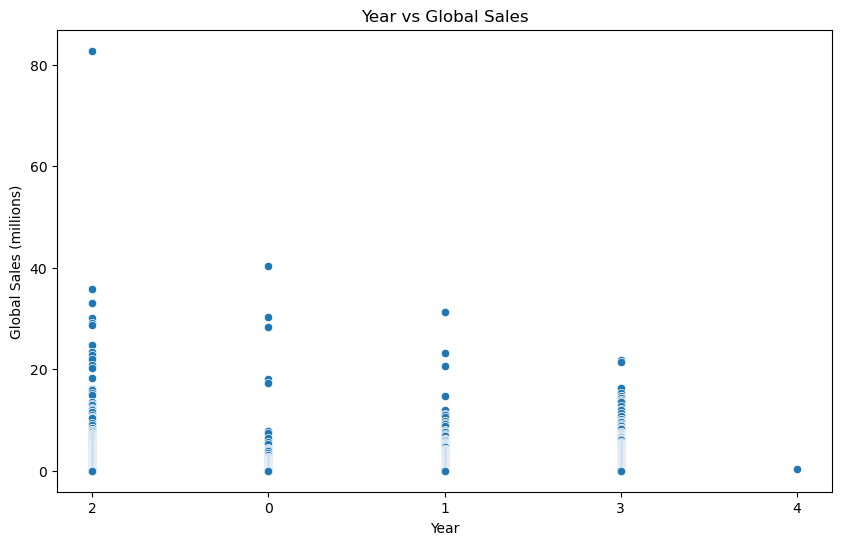

In [222]:
#relationship between the year and global sales?
plt.figure(figsize=(10, 6))
sb.scatterplot(x='year', y='Global_Sales', data=Data)
plt.title('Year vs Global Sales')
plt.xlabel('Year')
plt.ylabel('Global Sales (millions)')
plt.show()

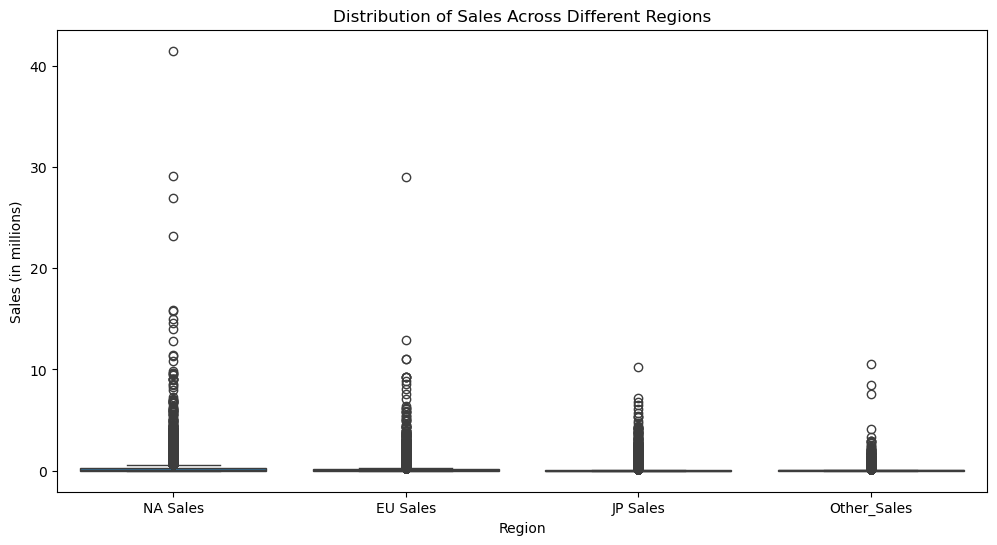

In [223]:
#the distribution of sales across different regions?
plt.figure(figsize=(12, 6))
sb.boxplot(data=Data[['NA_Sales', 'EU_Sales', 'JP_Sales','Other_Sales']])
plt.title('Distribution of Sales Across Different Regions')
plt.xlabel('Region')
plt.ylabel('Sales (in millions)')
plt.xticks([0, 1, 2,3], ['NA Sales', 'EU Sales', 'JP Sales','Other_Sales'])
plt.show()

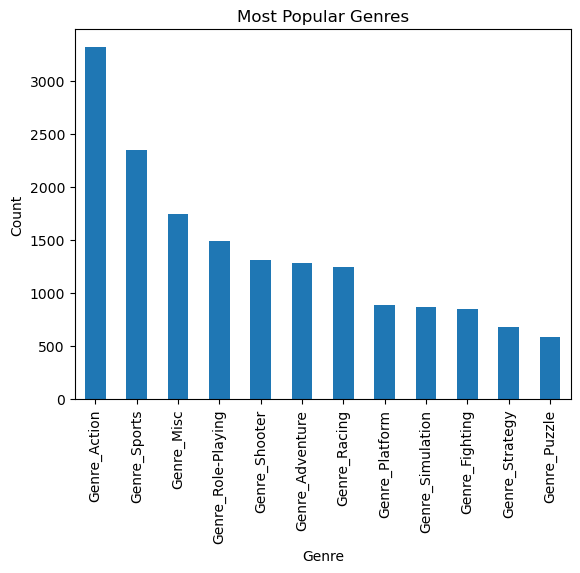

In [224]:
# most popular game genres?
genre_columns = ['Genre_Action', 'Genre_Adventure', 'Genre_Fighting', 'Genre_Misc', 
                 'Genre_Platform', 'Genre_Puzzle', 'Genre_Racing', 'Genre_Role-Playing', 
                 'Genre_Shooter', 'Genre_Simulation', 'Genre_Sports', 'Genre_Strategy']
Data[genre_columns].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Most Popular Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()

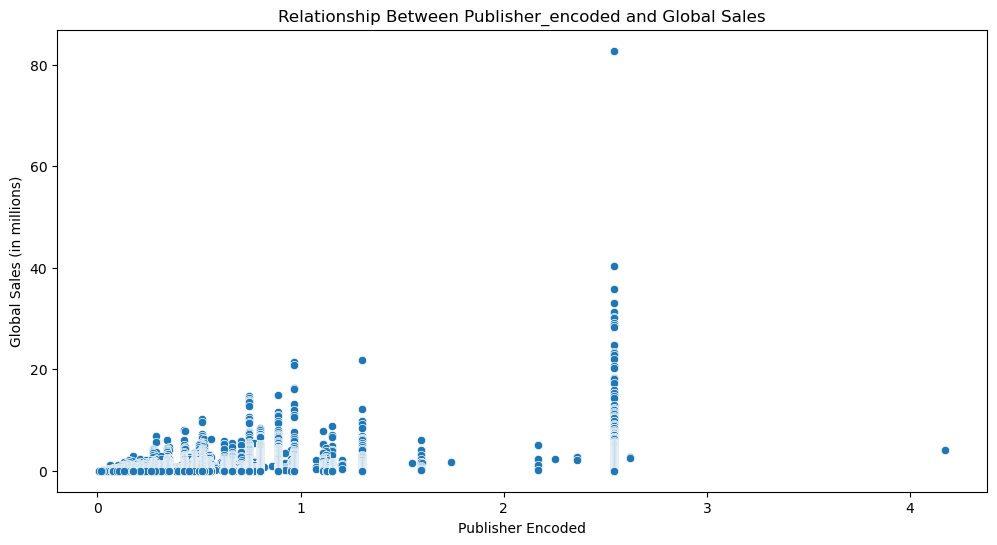

In [225]:
#the relationship between Publisher and global sales?
plt.figure(figsize=(12, 6))
sb.scatterplot(data=Data, x='Publisher_encoded', y='Global_Sales')
plt.title('Relationship Between Publisher_encoded and Global Sales')
plt.xlabel('Publisher Encoded')
plt.ylabel('Global Sales (in millions)')
plt.show()

In [226]:
#Random Forest Regressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [227]:
X = Data.drop('Global_Sales',axis='columns')
Y = Data["Global_Sales"]
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state = 43)

In [228]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, Y_train)

RandomForestRegressor(random_state=42)

In [229]:
y_pred = rf_model.predict(X_test)

In [230]:
rmse = mean_squared_error(Y_test, y_pred) ** 0.5
r2 = r2_score(Y_test, y_pred)
print('MSE : ' , rmse) 
print('RandomForestRegressor ACC : ' , r2) 

MSE :  0.3365589756591264
RandomForestRegressor ACC :  0.9538230173015918


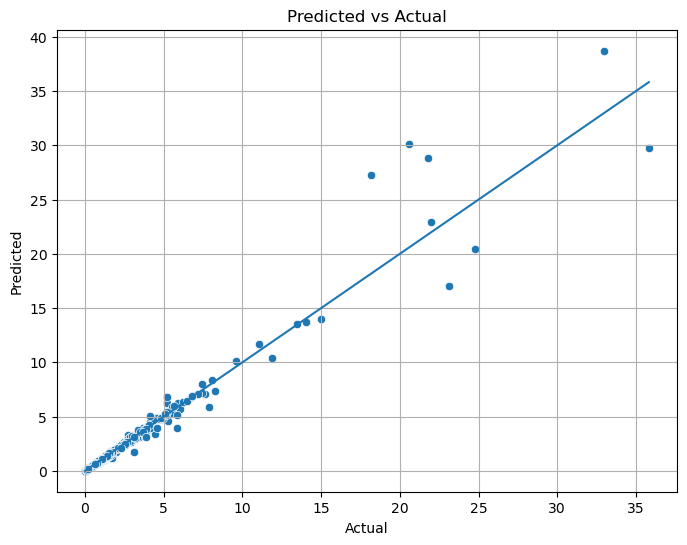

In [231]:
plt.figure(figsize=(8,6))
sb.scatterplot(x=Y_test, y=y_pred)
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)])  
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Predicted vs Actual")
plt.grid(True)
plt.show()

In [232]:
#Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
X = Data.drop('Global_Sales',axis='columns')
y = Data["Global_Sales"]

In [233]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [234]:
y_pred = lr_model.predict(X_test)

In [235]:
rmse = mean_squared_error(y_test, y_pred) ** 0.5
r2 = r2_score(y_test, y_pred)
print('MSE : ' , rmse) 
print('Linear Regression : ' , r2) 

MSE :  0.005230653703407799
Linear Regression :  0.9999934878914757


Summary:
Insights:
Platform Popularity: PlayStation and Xbox dominate in global sales.

Genre Trends: Action, Sports, and Shooter genres lead in sales over Puzzle or Adventure.

Publisher Impact: Major publishers like EA and Activision have higher sales due to better resources and marketing.

Release Timing: Game sales fluctuate by release year, often peaking around new console launches.

Sales Correlation: Popular platforms and genres strongly influence global sales performance.

Suggestions:
Targeted Marketing: Focus campaigns on top-performing platforms (e.g., PlayStation, Xbox).

Genre Investment: Prioritize development in high-selling genres like Action and Sports.

Strategic Partnerships: Smaller publishers can benefit from collaborations with industry giants.

Release Strategy: Time game launches with new console releases to maximize sales potential.